In [11]:
from pyspark.sql import SparkSession
import pyspark.sql.functions as F
import matplotlib.pyplot as plt
import pandas as pd

In [16]:
spark = SparkSession.builder \
    .appName("MyApp") \
    .config("spark.driver.extraClassPath", "C:/Program Files (x86)/PostgreSQL/pgJDBC/postgresql-42.5.1.jar") \
    .getOrCreate()

In [3]:
dfTaxi = spark.read.format("csv").option("header","true").load("data/taxi_data.csv")

In [4]:
dfTaxiWithOutDublicates = dfTaxi.dropDuplicates()

In [5]:
dfTaxiValid = dfTaxiWithOutDublicates.filter(F.col("dropoff_datetime") > F.col("pickup_datetime"))

In [6]:
dfRes = dfTaxiValid.groupBy(F.dayofweek("pickup_datetime").alias("DayOfWeek")).\
    agg(
        F.count("dropoff_datetime").alias("count"),
        F.round(F.avg("fare_amount"),2).alias("AvgAmount"),
        F.round((F.avg(
            F.expr("unix_timestamp(dropoff_datetime) - unix_timestamp(pickup_datetime)")
        ) / 60),2).alias("AvgMinute")
    )

In [20]:
dfpd = dfRes.toPandas()

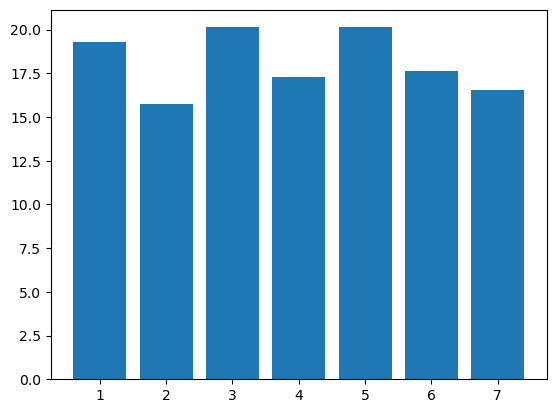

In [21]:
plt.bar(dfpd["DayOfWeek"],dfpd["AvgAmount"])
plt.show()

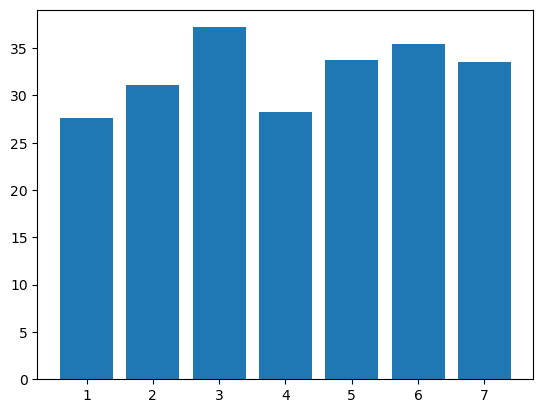

In [22]:
plt.bar(dfpd["DayOfWeek"],dfpd["AvgMinute"])
plt.show()